<a href="https://colab.research.google.com/github/Samarth2711/Play-Store-App-Review-Analysis/blob/main/%5BIN%5D_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
playstore_data = '/content/drive/MyDrive/Capstone Project/Individual NB/Play Store App Review Analysis/Play Store Data.csv'
df_ps = pd.read_csv(playstore_data)
user_reviews = '/content/drive/MyDrive/Capstone Project/Individual NB/Play Store App Review Analysis/User Reviews.csv'
df_user = pd.read_csv(user_reviews)

In [ ]:
df_ps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
df_ps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df_ps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df_ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
#finding the maximum rating of app in each category
max_rating_in_each_category = df_ps.groupby('Category')['Rating'].max().reset_index()

In [ ]:
max_rating_in_each_category.rename(columns={'Rating':'Max_Rating'})

,Category,Max_Rating
0,1.9,19.0
1,ART_AND_DESIGN,5.0
2,AUTO_AND_VEHICLES,4.9
3,BEAUTY,4.9
4,BOOKS_AND_REFERENCE,5.0
5,BUSINESS,5.0
6,COMICS,5.0
7,COMMUNICATION,5.0
8,DATING,5.0
9,EDUCATION,4.9


In [ ]:
#finding the minimum rating of app in each category
min_rating_in_each_category = df_ps.groupby('Category')['Rating'].min().reset_index()

In [ ]:
min_rating_in_each_category

,Category,Rating
0,1.9,19.0
1,ART_AND_DESIGN,3.2
2,AUTO_AND_VEHICLES,2.1
3,BEAUTY,3.1
4,BOOKS_AND_REFERENCE,2.7
5,BUSINESS,1.0
6,COMICS,2.8
7,COMMUNICATION,1.0
8,DATING,1.0
9,EDUCATION,3.5


In [ ]:
percent_missing = df_ps.isnull().sum() * 100 / len(df_ps)
missing_value_df = pd.DataFrame({'column_name': df_ps.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df

,column_name,percent_missing
App,App,0.000000
Category,Category,0.000000
Rating,Rating,13.596532
Reviews,Reviews,0.000000
Size,Size,0.000000
Installs,Installs,0.000000
Type,Type,0.009224
Price,Price,0.000000
Content Rating,Content Rating,0.009224
Genres,Genres,0.000000


Dropping null values

In [ ]:
df_ps = df_ps[df_ps['Current Ver'].notna()]
df_ps = df_ps[df_ps['Android Ver'].notna()]
df_ps = df_ps[df_ps['Type'].notna()]

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = df_ps[~df_ps['Rating'].isnull()]['Rating'].mean()
median_rating = df_ps[~df_ps['Rating'].isnull()]['Rating'].median()

In [ ]:
mean_rating, median_rating

(4.191837606837606, 4.3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


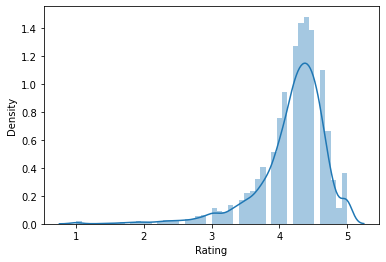

In [ ]:
sns.distplot(df_ps['Rating'])

From the distplot visualizations, it is clear that the ratings are left skewed.

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
df_ps['Rating'].fillna(value=median_rating,inplace=True)

Dropping duplicates from "App" column

In [ ]:
df_ps = df_ps.drop_duplicates(subset = 'App')

In [ ]:
# Dropping dollar symbol applied to the price column
df_ps['Price'] = df_ps['Price'].apply(lambda x: float(x[1:]) if '$' in x else float(x))
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Chaging the datatype of installs to integer by removing commas and "+" symbols

df_ps['Installs'] = df_ps['Installs'].apply(lambda x: int(x[:-1].replace(',',''))  if '+' and ',' in x else (int(x[:-1]) if '+' in x else int(x)))

In [ ]:
#chagnging the datatype of Last updated to date_time for easy processing
df_ps["Last Updated"] = pd.to_datetime(df_ps['Last Updated'])

In [ ]:
#Bringing the size column to same units that is "MB"
df_ps['Size'] = df_ps['Size'].apply(lambda x: float(x[:-1]) if 'M' in x else (round(float(x[:-1])/1024, 4) if 'k' in x else x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


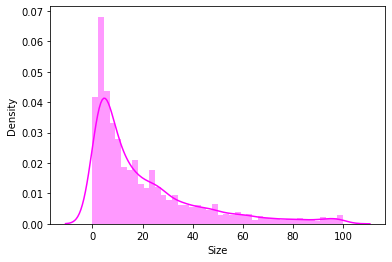

In [ ]:

sns.distplot(df_ps[df_ps['Size'] != 'Varies with device']['Size'], color='Magenta')

The data in the Size column is skewed towards the right.

In [ ]:
#converting reviews to type int

df_ps['Reviews'] = df_ps['Reviews'].astype(int)

In [ ]:
percent_missing_user = df_user.isnull().sum() * 100 / len(df_user)
missing_value_df_user = pd.DataFrame({'column_name': df_user.columns,
                                 'percent_missing': percent_missing_user})

In [ ]:
missing_value_df_user

,column_name,percent_missing
App,App,0.000000
Translated_Review,Translated_Review,41.788631
Sentiment,Sentiment,41.780854
Sentiment_Polarity,Sentiment_Polarity,41.780854
Sentiment_Subjectivity,Sentiment_Subjectivity,41.780854


In [ ]:
df_user = df_user.dropna()

In [ ]:
merged_df = pd.merge(df_ps, df_user, on='App', how = "inner")

In [ ]:
percent_missing_merged = merged_df.isnull().sum() * 100 / len(merged_df)
missing_value_df_merged = pd.DataFrame({'column_name': merged_df.columns,
                                 'percent_missing': percent_missing_merged})

In [ ]:
missing_value_df_merged

,column_name,percent_missing
App,App,0.0
Category,Category,0.0
Rating,Rating,0.0
Reviews,Reviews,0.0
Size,Size,0.0
Installs,Installs,0.0
Type,Type,0.0
Price,Price,0.0
Content Rating,Content Rating,0.0
Genres,Genres,0.0


Top Categories on Play Store

In [ ]:
df_ps.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
x = df_ps['Category'].value_counts()
y = df_ps['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

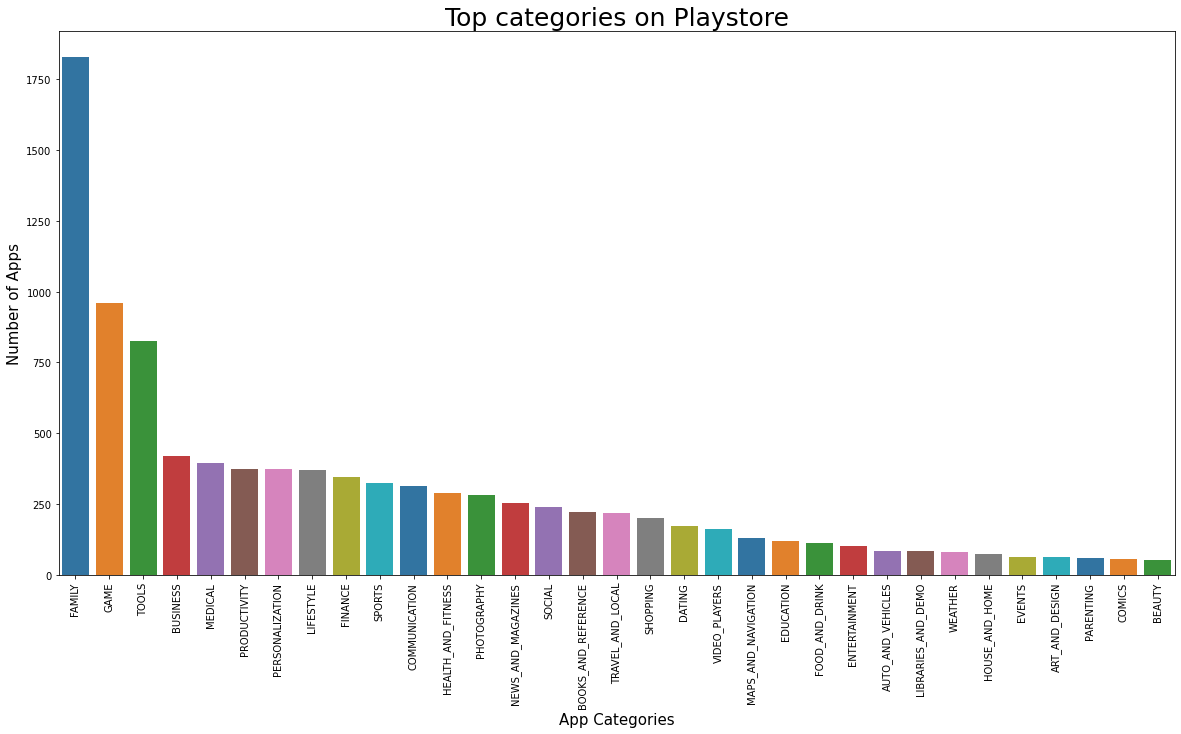

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('App Categories', size=15)
plt.ylabel('Number of Apps', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 90,);

Which category apps are most installed?

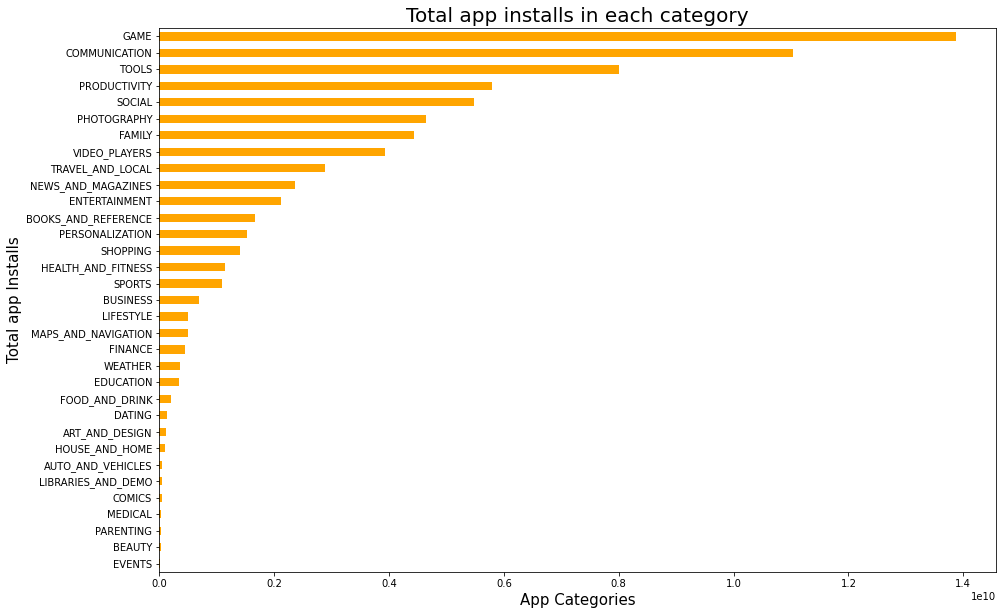

In [ ]:
# total app installs in each category of the play store

a = df_ps.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'orange', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20);

Percentage of Free vs Paid apps

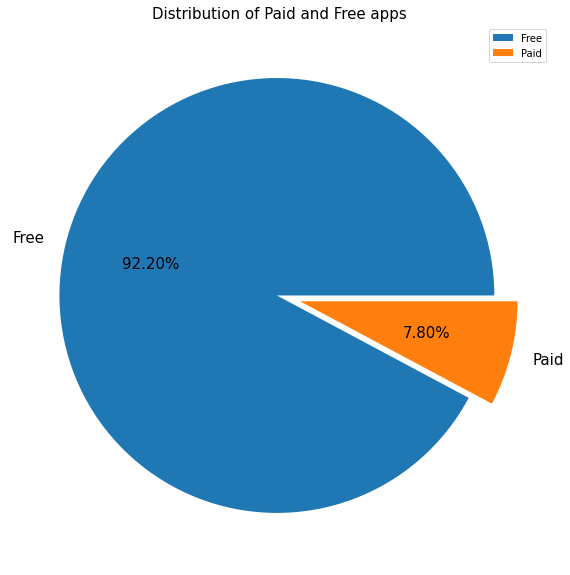

In [ ]:
data = df_ps['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
explode=(0.01,0.1)
plt.pie(data, labels = labels, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

Which category apps are most installed?

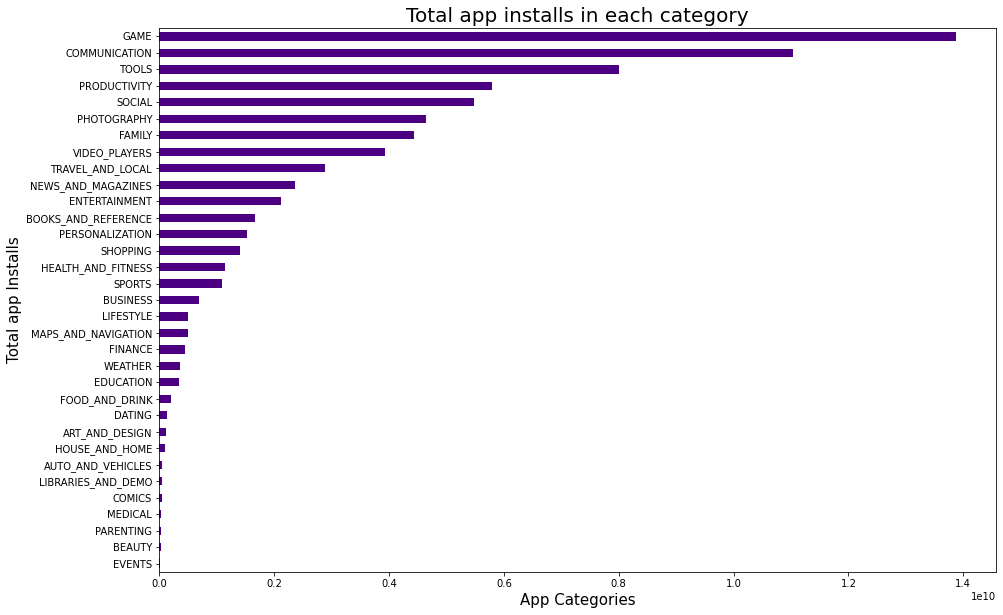

In [ ]:
# Total app installs in each category of the play store

a = df_ps.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'indigo', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20);